In [1]:
# !pip install konlpy

In [29]:
# !pip install nltk

In [30]:
# !pip install transformers

  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached filelock-3.12.2-py3-none-any.whl (10 kB)
  Using cached huggingface_hub-0.15.1-py3-none-any.whl (236 kB)
                                              0.0/3.5 MB ? eta -:--:--
                                              0.0/3.5 MB ? eta -:--:--
                                              0.0/3.5 MB 660.6 kB/s eta 0:00:06
                                              0.1/3.5 MB 975.2 kB/s eta 0:00:04
     -                                        0.1/3.5 MB 1.4 MB/s eta 0:00:03
     --                                       0.2/3.5 MB 1.5 MB/s eta 0:00:03
     ----                                     0.3/3.5 MB 2.0 MB/s eta 0:00:02
     -----                                    0.4/3.5 MB 2.1 MB/s eta 0:00:02
     ------                                   0.6/3.5 MB 2.2 MB/s eta 0:00:02
     --------                                 0.7/3.5 MB 2.4 MB/s eta 0:00:02
     ---------                                0.8

In [1]:
import os
import sys
import time
import urllib.request
import datetime
import time
import json
from bs4 import BeautifulSoup
import pandas as pd
import math
import requests
import re
from tqdm import tqdm

In [2]:
from konlpy.tag import Kkma        
kkma = Kkma()
from konlpy.tag import Hannanum    
hannanum = Hannanum()
from konlpy.tag import Okt         
t = Okt() 
from konlpy.tag import *
import nltk
import pickle
import copy
from tqdm import tqdm

In [7]:
news_data = pd.read_csv('./AI 뉴스 데이터1.csv', encoding='utf-8')
news_data2 = pd.read_csv('./AI 뉴스 데이터2.csv', encoding='utf-8')
news_data3 = pd.read_csv('./AI 뉴스 데이터3.csv', encoding='utf-8')
news_data4 = pd.read_csv('./AI 뉴스 데이터4.csv', encoding='utf-8')
news_data5 = pd.read_csv('./AI 뉴스 데이터5.csv', encoding='utf-8')
news_data6 = pd.read_csv('./AI 뉴스 데이터6.csv', encoding='utf-8')
news_data7 = pd.read_csv('./AI 뉴스 데이터7.csv', encoding='utf-8')
news_data8 = pd.read_csv('./AI 뉴스 데이터8.csv', encoding='utf-8')
news_data9 = pd.read_csv('./AI 뉴스 데이터9.csv', encoding='utf-8')
news_data10 = pd.read_csv('./AI 뉴스 데이터10.csv', encoding='utf-8')
news_data11 = pd.read_csv('./AI 뉴스 데이터11.csv', encoding='utf-8')
news_data12 = pd.read_csv('./AI 뉴스 데이터12.csv', encoding='utf-8')
news_data13 = pd.read_csv('./AI 뉴스 데이터13.csv', encoding='utf-8')
news_data14 = pd.read_csv('./AI 뉴스 데이터14.csv', encoding='utf-8')
news_data15 = pd.read_csv('./AI 뉴스 데이터15.csv', encoding='utf-8')
news_data16 = pd.read_csv('./AI 뉴스 데이터16.csv', encoding='utf-8')
news_data17 = pd.read_csv('./AI 뉴스 데이터17.csv', encoding='utf-8')
news_data18 = pd.read_csv('./AI 뉴스 데이터18.csv', encoding='utf-8')

NEWS_DATE = [news_data, news_data2, news_data3, news_data4, news_data5, news_data6, news_data7, news_data8, news_data9, news_data10, news_data11, news_data12, news_data13, news_data14,news_data15, news_data16, news_data17, news_data18]


In [9]:
print(news_data.head())
print(news_data2.head())
print(news_data3.head())
print(news_data4.head())
print(news_data5.head())
print(news_data6.head())
print(news_data7.head())
print(news_data8.head())
print(news_data9.head())
print(news_data10.head())
print(news_data11.head())
print(news_data12.head())
print(news_data13.head())
print(news_data14.head())
print(news_data15.head())
print(news_data16.head())
print(news_data17.head())
print(news_data18.head())

                  날짜                                    제목  \
0   2023.06.23 13:04  셀바스AI, 유증으로 571억 확보…AI의료·교육 등 신사업 추진   
1   2023.06.23 10:40                셀바스AI, 주주배정 유상증자 청약 완료   
2   2023.06.23 10:00        셀바스AI, 571억원 규모 구주주 배정 유상증자 성공   
3   2023.06.23 09:49   셀바스AI, 유상증자 청약률 100.80% 기록…571억원 확보   
4   2023.06.22 10:48                 셀바스AI, AI 의료서비스 본격 추진   

                                                  내용  
0  \t\t\t 셀바스AI가 571억 규모의 유상증자에 성공했다.셀바스AI는 지난 21...  
1  \t\t\t [서울=뉴시스]우연수 기자 = 셀바스AI가 400만주를 모집하는 주주 ...  
2  유상증자 청약률 100.80%AI의료·교육·메타로빌리티 신사업 탄력 ◆…셀바스AI ...  
3  의료AI·교육·메타로빌리티 신사업 탄력셀바스AI는 571억원 규모의 유상증자에 성공...  
4  제이엘케이 솔루션에 연동[이데일리 최훈길 기자] 인공지능(AI) 전문기업 셀바스AI...  
                  날짜                                    제목  \
0   2023.06.12 14:19   셀바스AI 자회사, 美 FDA 승인 임박 울트라사이트 지분 취득   
1   2023.06.12 09:30       셀바스AI, 소방서 119 신고접수에 AI 음성인식 적용   
2   2023.06.12 09:18  셀바스AI, '지능형 119신고접수 플랫폼'에 AI 음성인식 적용   
3   2023.06.12 08:42  셀바스AI, '지능형 119신고접수 플랫폼'에 A

In [77]:
import re
regex = r'[^\w\s]'
# text 열의 모든 값을 대상으로 정규표현식을 적용하여 특수문자를 제거
news_data5['내용정리'] = news_data5['내용'].apply(lambda x: re.sub(regex, ' ',str(x)))
news_data5['내용정리'][0]

'\t\t\t  서울 뉴시스  신항섭 기자   셀바스AI는 운영자금 및 채무상환자금 조달을 위해 400만주를 발행하는 주주배정 후 실권주 일반공모 유상증자를 결정했다고 7일 공시했다 청약일은 오는 6월7일부터 8일까지이며 예정발행가는 주당 1만9710원이다  '

In [78]:
news_data5['내용정리']

0     \t\t\t  서울 뉴시스  신항섭 기자   셀바스AI는 운영자금 및 채무상환자금 ...
1     완성도 높은 음성인식 기술 보유 정부 대기업에서 러브콜 잇달아최근 GPT와 접목 신...
2     \t\t\t  서울 뉴시스  신항섭 기자   셀바스AI는 이날 오후 2시에 국내 주...
3     \t\t\t  이데일리 이용성 기자  셀바스AI 108860 가 로보티즈와  AI ...
4     기사내용 요약GPT 응용한 대화형 AI 로봇 사업 협력로봇이 사람의 말 듣고 이해하...
5     \t\t\t 셀바스AI가 강세다  인공지능 AI  음성기술은 로봇 생태계를 확장하는...
6     \t\t\t  이데일리 이용성 기자  셀바스AI 108860 가 로보티즈 10849...
7       위지윅스튜디오  셀바스AI  메라커 CI  사진 위지윅스튜디오 제공위지윅스튜디오...
8     \t\t\t  이데일리 이용성 기자  인공지능 전문기업 셀바스AI 108860 는 ...
9     IP와 음성AI  비전AI가 만나 시공간의 한계 뛰어넘는다     아티스트의 개인화...
10    \t\t\t 셀바스헬스케어가 강세다  정부의 의료기기 산업 육성 정책이 주가에 긍정...
11     서울 뉴시스  김경택 기자   인공지능 전문기업 셀바스AI는 의료기기 전시회  키...
12    \t\t\t  이데일리 김응태 기자  인공지능 전문기업 셀바스AI 108860 는 ...
13    \t\t\t 위세아이텍이 강세다  국내 소프트웨어 업종 평균 대비 저평가 상태라는 ...
14    올 들어 주가 320 39  급등  연일 최고가 경신교육과 비대면 진료로까지 사업 ...
15    한컴위드 셀바스AI 로고 한컴위드 제공  재판매 및 DB 금지   한컴위드는 인공지...
16    한컴위드 기술 접목해  셀비 체크업  고도화한컴위드 NFT 사업에 셀바스AI 기술 ...
17    셀바스AI 발병 확률 예측 제품에 한컴위드 암호화기술 접목블록체인 기반 NF

In [79]:
pos_tag = []

# news_data 데이터프레임의 각 행에 대해 반복
for _, row in tqdm(news_data5.iterrows()):
    # 현재 행의 content 값을 news_text 변수에 할당
    news_text = row['내용정리']
    
    # PosTagging
    tokens_ko = t.pos(news_text)
    pos_tag.append(tokens_ko)

57it [00:02, 19.23it/s]


In [80]:
#첫번째 행의 Pos Tagging
print(pos_tag[0])

[('\t\t\t  ', 'Foreign'), ('서울', 'Noun'), ('뉴시스', 'Noun'), ('신', 'Modifier'), ('항섭', 'Noun'), ('기자', 'Noun'), ('셀', 'Noun'), ('바스', 'Noun'), ('AI', 'Alpha'), ('는', 'Verb'), ('운영', 'Noun'), ('자금', 'Noun'), ('및', 'Noun'), ('채무', 'Noun'), ('상환', 'Noun'), ('자금', 'Noun'), ('조달', 'Noun'), ('을', 'Josa'), ('위해', 'Noun'), ('400만', 'Number'), ('주를', 'Foreign'), ('발행', 'Noun'), ('하는', 'Verb'), ('주주', 'Noun'), ('배정', 'Noun'), ('후', 'Noun'), ('실권', 'Noun'), ('주', 'Noun'), ('일반', 'Noun'), ('공모', 'Noun'), ('유상증자', 'Noun'), ('를', 'Josa'), ('결정', 'Noun'), ('했다고', 'Verb'), ('7일', 'Number'), ('공시', 'Noun'), ('했다', 'Verb'), ('청약', 'Noun'), ('일', 'Noun'), ('은', 'Josa'), ('오는', 'Verb'), ('6월', 'Number'), ('7일', 'Number'), ('부터', 'Foreign'), ('8일', 'Number'), ('까지이며', 'Foreign'), ('예정', 'Noun'), ('발행', 'Noun'), ('가는', 'Verb'), ('주당', 'Verb'), ('1만', 'Number'), ('9710원', 'Number'), ('이다', 'Foreign')]


In [81]:
normalization_li = []
for pos in pos_tag: 
    in_li = []
    for ele in pos:
        #품사가 조사, 접속사이면 continue
        if ele[1] in ['Josa','Suffix']:
            continue
        in_li.append(ele[0])
    normalization_li.append(in_li)
print(normalization_li[0])

['\t\t\t  ', '서울', '뉴시스', '신', '항섭', '기자', '셀', '바스', 'AI', '는', '운영', '자금', '및', '채무', '상환', '자금', '조달', '위해', '400만', '주를', '발행', '하는', '주주', '배정', '후', '실권', '주', '일반', '공모', '유상증자', '결정', '했다고', '7일', '공시', '했다', '청약', '일', '오는', '6월', '7일', '부터', '8일', '까지이며', '예정', '발행', '가는', '주당', '1만', '9710원', '이다']


In [82]:
with open('./stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거
okt = Okt()

In [83]:
tokens = normalization_li
token_stop = []
for token in tokens:
    in_li = []
    for tok in token:
        if tok not in stopwords:
            in_li.append(tok)
    token_stop.append(in_li)
print(token_stop[0]) 

['\t\t\t  ', '서울', '뉴시스', '신', '항섭', '기자', '셀', '바스', 'AI', '는', '운영', '자금', '채무', '상환', '자금', '조달', '위해', '400만', '주를', '발행', '하는', '주주', '배정', '후', '실권', '주', '일반', '공모', '유상증자', '결정', '했다고', '7일', '공시', '했다', '청약', '오는', '6월', '7일', '8일', '까지이며', '예정', '발행', '가는', '주당', '1만', '9710원', '이다']


In [84]:
df_li = []
for tokens in token_stop:
    token = ' '.join(tokens)
    df_li.append(token)
df = pd.DataFrame(df_li).rename(columns = {0:'처리_내용'})
df.head()

,처리_내용
0,\t\t\t 서울 뉴시스 신 항섭 기자 셀 바스 AI 는 운영 자금 채무 상환 ...
1,완성 높은 음성인식 기술 보유 정부 대기업 러브콜 잇 달 최근 GPT 접목 신 산업...
2,\t\t\t 서울 뉴시스 신 항섭 기자 셀 바스 AI 는 날 오후 2시 국내 주...
3,\t\t\t 이데일리 이용성 기자 셀 바스 AI 108860 로보티즈 AI 로봇...
4,기사 내용 요약 GPT 응용 대화 AI 로봇 사업 협력 로봇 사람 말 듣고 이해 대...


In [85]:
news_data5 = pd.concat([news_data5,df],axis=1)
#비어있는 5개의 행은 '없음'으로 결측치 처리
news_data5['내용정리'] = news_data5['내용정리'].fillna('없음')
news_data5['처리_내용'] = news_data5['처리_내용'].fillna('없음')
news_data5.head()

,날짜,제목,내용,내용정리,처리_내용
0,2023.04.07 16:16,"셀바스AI, 400만주 일반공모 유상증자 결정",\t\t\t [서울=뉴시스] 신항섭 기자 = 셀바스AI는 운영자금 및 채무상환자금 ...,\t\t\t 서울 뉴시스 신항섭 기자 셀바스AI는 운영자금 및 채무상환자금 ...,\t\t\t 서울 뉴시스 신 항섭 기자 셀 바스 AI 는 운영 자금 채무 상환 ...
1,2023.04.05 09:08,[AI혁명]⑫매출 500억 찍은 셀바스AI…서비스 로봇 개발 협력,완성도 높은 음성인식 기술 보유 정부·대기업에서 러브콜 잇달아최근 GPT와 접목…신...,완성도 높은 음성인식 기술 보유 정부 대기업에서 러브콜 잇달아최근 GPT와 접목 신...,완성 높은 음성인식 기술 보유 정부 대기업 러브콜 잇 달 최근 GPT 접목 신 산업...
2,2023.04.04 10:50,"셀바스AI, 4일 기업설명회",\t\t\t [서울=뉴시스] 신항섭 기자 = 셀바스AI는 이날 오후 2시에 국내 주...,\t\t\t 서울 뉴시스 신항섭 기자 셀바스AI는 이날 오후 2시에 국내 주...,\t\t\t 서울 뉴시스 신 항섭 기자 셀 바스 AI 는 날 오후 2시 국내 주...
3,2023.04.04 09:23,"[특징주]셀바스AI, 대화형 AI로봇 사업 추진 소식에 6%대 강세",\t\t\t [이데일리 이용성 기자] 셀바스AI(108860)가 로보티즈와 ‘AI ...,\t\t\t 이데일리 이용성 기자 셀바스AI 108860 가 로보티즈와 AI ...,\t\t\t 이데일리 이용성 기자 셀 바스 AI 108860 로보티즈 AI 로봇...
4,2023.04.04 09:19,셀바스AI-로보티즈 협력…대화형 AI 로봇 시대 앞당긴다,기사내용 요약GPT 응용한 대화형 AI 로봇 사업 협력로봇이 사람의 말 듣고 이해하...,기사내용 요약GPT 응용한 대화형 AI 로봇 사업 협력로봇이 사람의 말 듣고 이해하...,기사 내용 요약 GPT 응용 대화 AI 로봇 사업 협력 로봇 사람 말 듣고 이해 대...


In [86]:
news_data2.to_csv('셀바스AI_preprocess5.csv', index=False, encoding='utf-8-sig')

In [87]:
import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma        ; kkma = Kkma()
from konlpy.tag import Hannanum    ; hannanum = Hannanum()
from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *
import nltk
import pickle

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz
from sklearn.tree import export_graphviz

import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [92]:
AI셀바스_process3 = pd.read_csv('./셀바스AI_preprocess3.csv')

In [93]:
news_text = ''
news_data = AI셀바스_process3.reset_index(drop=True)
for _, row in news_data.iterrows():
    news_text += row['처리_내용']

In [94]:
tokens_ko = t.morphs(news_text)
ko = nltk.Text(tokens_ko)

print(len(ko.tokens))          # 토큰 전체 개수
print(len(set(ko.tokens)))     # 토큰 unique 개수
print(ko.vocab().most_common(20))

14977
2626
[('AI', 363), ('했다', 183), ('데이터', 125), ('뷰노', 123), ('셀', 114), ('바스', 112), ('할', 109), ('지능', 104), ('의료', 100), ('기업', 97), ('서비스', 94), ('수', 92), ('플리', 92), ('인공', 88), ('대표', 86), ('해', 84), ('사업', 83), ('토', 83), ('기술', 82), ('솔루션', 82)]


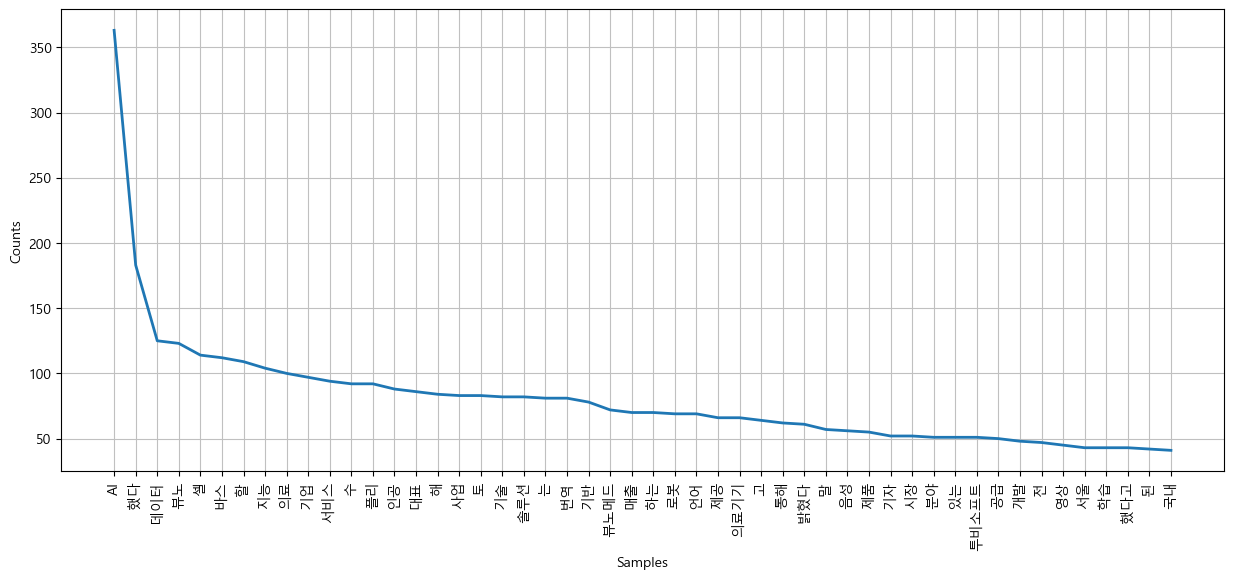

In [95]:
tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stopwords]

ko = nltk.Text(tokens_ko)

# 그래프에서 한글 폰트가 깨질 경우 실행
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

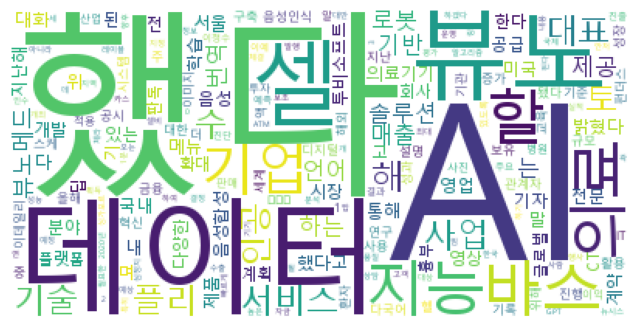

In [96]:
data = ko.vocab().most_common(300)
wordcloud = WordCloud(
                        font_path ='c:/Windows/Fonts/malgun.ttf'
                      , relative_scaling =0.2
                      , background_color ='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
import pandas as pd
import numpy as np
import re
import os
from transformers import pipeline

In [30]:
class IndustryAnalysis:

    def __init__(self, industry, time=''):
        self.industry = str(industry)
        self.time = time

    def path(self):
        if self.time == 'all':
            path = ['../뉴스데이터 수집/'+ i for i in os.listdir('../뉴스데이터 수집/')]
            path = path[::-1]
        else:
            path = [f'../뉴스데이터 수집/{self.industry}산업_{self.time}.csv']
        
        return path
    
    def clean(self, con):

        ind = pd.read.csv(path)
        ind_cont = ind['내용']

        